In [2]:
import sys
sys.path.append("/users/PCON0003/cond0068/ARA/root6_18_build/lib") # go to parent dir
# sys.path.append("/users/PAS0654/osu8354/ARA/AraRootBuild/lib/") # go to parent dir

from ROOT import TCanvas, TGraph
from ROOT import gROOT
import ROOT
import os
import matplotlib.pyplot as plt
# from TimingCalibration import HistPlotter2D
import numpy as np
# ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libGraf3d.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libTreePlayer.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libPostscript.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libPhysics.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libROOTDataFrame.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libMathMore.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libMinuit.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libSpectrum.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libRint.so")

ROOT.gSystem.Load( '%s/lib/libAraEvent.so' % ( os.getenv('HOME') ) )

print('%s/lib/libAraEvent.so'%(os.getenv('HOME')))
print(os.environ['HOME'])
from AutomaticLoadData import LoadDataFromWeb
from TimingCalibration_final import AddOffsets
from TimingCalibration_final import CorrectTimingSample
from TimingCalibration_final import SineFit, SineFunc, invertedFit, reject_outliers

Welcome to JupyROOT 6.18/04
/users/PCON0003/cond0068/lib/libAraEvent.so
/users/PCON0003/cond0068


## Load all variables and define stuff

In [11]:
wf_len = 896
station = 4
channel = 1
rootfile = "2840"
freq = 0.218

#load in data
all_times, volt,blocks = LoadDataFromWeb(station,rootfile,"0118","2018",int(channel),wf_len,0,1,0,0,1)
time = all_times[0]-all_times[0][0]
print('number of events is', np.shape(volt)[0])

num_blocks=len(volt[:,0])#num blocks entries = num events

best_params = np.zeros([num_blocks,4]) #creates a num_blocksx4 array
odds = np.linspace(1,wf_len-1,wf_len/2,dtype=int) #a list containing only odd numbers
evens = np.linspace(0,wf_len-2,wf_len/2,dtype=int)

odd_params=np.zeros([num_blocks,3])
even_params=np.zeros([num_blocks,3])
odd_params2 = np.zeros([num_blocks,3])

odd_half = np.linspace(1,63,32,dtype=int)
even_half= np.linspace(0,62,32,dtype=int)

odd_half2 = np.linspace(65,127,32,dtype=int)

jitter_avg = np.zeros(128)
t_cal = np.zeros(128)

#load all 128 samples into arrays
best_blocks = []
best_freqs = []
jitter_total = []
odd_diffs = []
line_diffs = []

spacing = 0.625#This is the spacing, in ns, between odd/even samples

if(t_cal[5]==0.0):
    print('clearing out old t_cal')
    t_cal=time[:128]
    print(t_cal)

t_cal_full = time
# print('t_cal before is', t_cal_full)

odd_mean = 0.0
even_mean = 0.0

number of events is 1994
clearing out old t_cal
[ 0.      0.3125  0.625   0.9375  1.25    1.5625  1.875   2.1875  2.5
  2.8125  3.125   3.4375  3.75    4.0625  4.375   4.6875  5.      5.3125
  5.625   5.9375  6.25    6.5625  6.875   7.1875  7.5     7.8125  8.125
  8.4375  8.75    9.0625  9.375   9.6875 10.     10.3125 10.625  10.9375
 11.25   11.5625 11.875  12.1875 12.5    12.8125 13.125  13.4375 13.75
 14.0625 14.375  14.6875 15.     15.3125 15.625  15.9375 16.25   16.5625
 16.875  17.1875 17.5    17.8125 18.125  18.4375 18.75   19.0625 19.375
 19.6875 20.     20.3125 20.625  20.9375 21.25   21.5625 21.875  22.1875
 22.5    22.8125 23.125  23.4375 23.75   24.0625 24.375  24.6875 25.
 25.3125 25.625  25.9375 26.25   26.5625 26.875  27.1875 27.5    27.8125
 28.125  28.4375 28.75   29.0625 29.375  29.6875 30.     30.3125 30.625
 30.9375 31.25   31.5625 31.875  32.1875 32.5    32.8125 33.125  33.4375
 33.75   34.0625 34.375  34.6875 35.     35.3125 35.625  35.9375 36.25
 36.5625 36.875  

/apps/python/3.6-conda5.2/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
/apps/python/3.6-conda5.2/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


## Add offsets

896
success
success
the offsets are: 0.791, 0.619
[  0.           0.31398832   0.62797664   0.94196496   1.25595328
   1.56994161   1.88392993   2.19791825   2.51190657   2.82589489
   3.13988321   3.45387153   3.76785985   4.08184818   4.3958365
   4.70982482   5.02381314   5.33780146   5.65178978   5.9657781
   6.27976642   6.59375475   6.90774307   7.22173139   7.53571971
   7.84970803   8.16369635   8.47768467   8.79167299   9.10566132
   9.41964964   9.73363796  10.04762628  10.3616146   10.67560292
  10.98959124  11.30357956  11.61756789  11.93155621  12.24554453
  12.55953285  12.87352117  13.18750949  13.50149781  13.81548613
  14.12947446  14.44346278  14.7574511   15.07143942  15.38542774
  15.69941606  16.01340438  16.3273927   16.64138103  16.95536935
  17.26935767  17.58334599  17.89733431  18.21132263  18.52531095
  18.83929927  19.1532876   19.46727592  19.78126424  20.92209198
  21.2366419   21.55119181  21.86574173  22.18029164  22.49484156
  22.80939147  23.12394139  

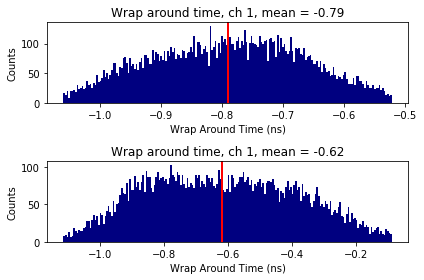

In [12]:
t_cal_full,odd_mean,even_mean=AddOffsets(t_cal_full,volt,freq,odds,odd_mean,even_mean, channel)

## Fit odd blocks and get fit parameters

In [32]:
for i in range(0,num_blocks):
    odd_params[i,:]=SineFit(t_cal_full[odds],volt[i,odds],freq)

In [33]:
freq_no_outliers = reject_outliers(np.asarray(odd_params[:,0]))
mean_freq = np.mean(freq_no_outliers)
print('mean frequency is', mean_freq)
#histogram([odd_params[:,1],even_params[:,1]],'')

#Scale timing to reflect true frequency
t_cal_full=t_cal_full*mean_freq/freq

mean frequency is 0.21884838597596232


### How does the freq distribution looks like?

Text(0.5,0,'Freq [GHz]')

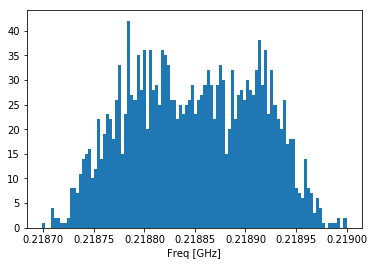

In [34]:
plt.hist(freq_no_outliers,bins=100);
plt.xlabel("Freq [GHz]")

### Re-fit using new timing

In [35]:
for i in range(0,num_blocks):
    odd_params[i,:]=SineFit(t_cal_full[odds],volt[i,odds],freq)

In [36]:
t_cal = t_cal_full[:128]
np.shape(t_cal)
jitter_array = []
sample_array = []
slope_array = []
jitter_slope = []
new_spacing = np.zeros(128)

In [37]:
for k in range(0,896):
    counter = 0
    for i in range(0,num_blocks):
        if(np.abs(volt[i,k])<30.0 and (freq-odd_params[i,0])<0.002):# and np.abs(odd_params[i,2]>200)):


            try:
                invert_fit = invertedFit(odd_params[i,:],t_cal_full[k],volt[i,k])
                jitter_array.append(invert_fit)
                sample_array.append(k%128)
                counter = counter+1
            except:
                print('error in finding inverse!')

    t_cal_full[k]=t_cal_full[k]+np.mean(jitter_array[-counter:])
    if(k>0):
        new_spacing[k%128]=new_spacing[k%128]+t_cal_full[k]-t_cal_full[k-1]

In [38]:
np.shape(t_cal_full)

(896,)

In [39]:
new_spacing[1:]=new_spacing[1:]/7.0
new_spacing[0]=new_spacing[0]/6.0
#print('spacing is', new_spacing)

for i in range(0,896):
    if(i==0):
        t_cal_full[i]=0.0
    else:
        t_cal_full[i]=t_cal_full[i-1]+new_spacing[(i)%128]


#print('final t_cal is',t_cal_full)

t_cal=t_cal_full[:128]

In [ ]:
plt.plot(all_times[0])
# plt.plot(t_cal_full+all_times[0][0])
plt.plot(time_cal+all_times[0][0])

In [43]:
time_cal = np.load('./ARA4_cal_files/t_cal_2840_1.npy')